In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
import tensorflow_hub as hub

from imblearn.over_sampling import RandomOverSampler

In [51]:
df = pd.read_csv('diabetes.csv')

In [52]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [53]:
# The columns that are available in the dataframe
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

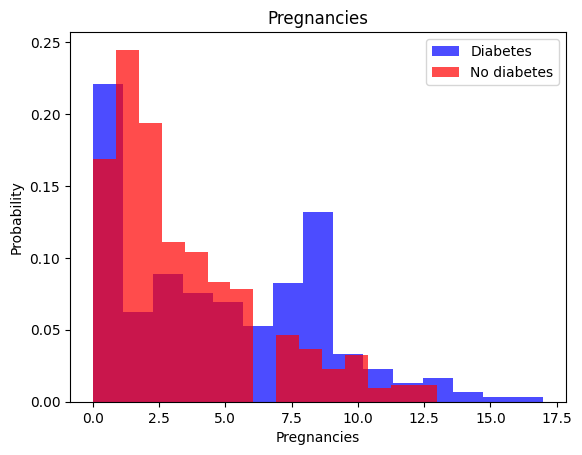

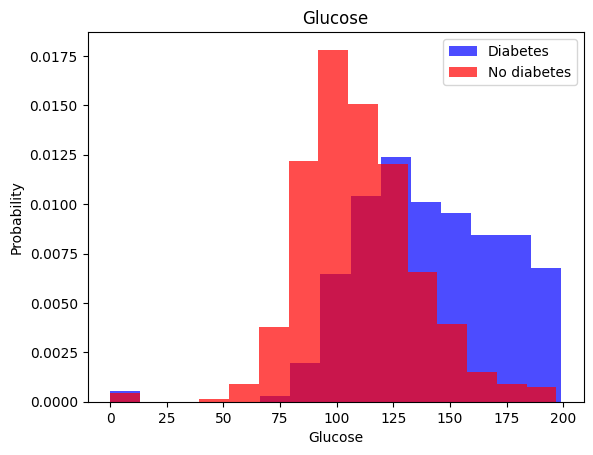

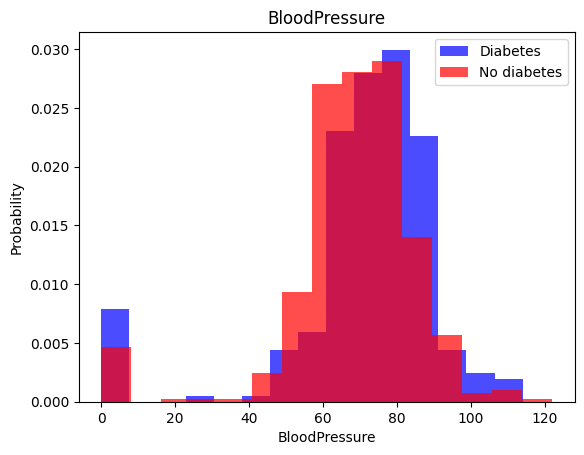

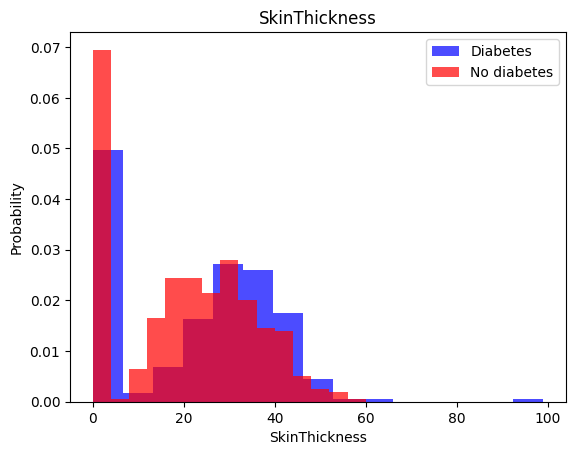

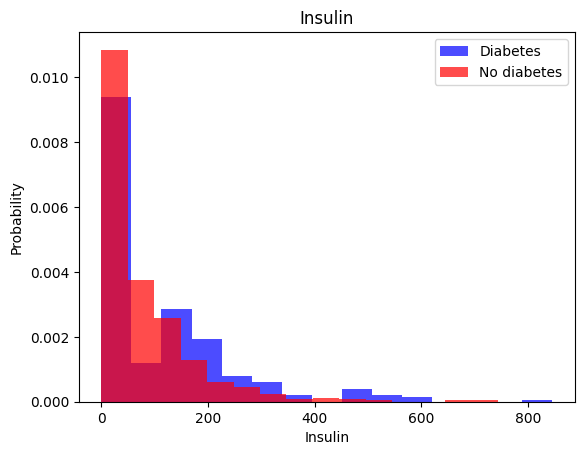

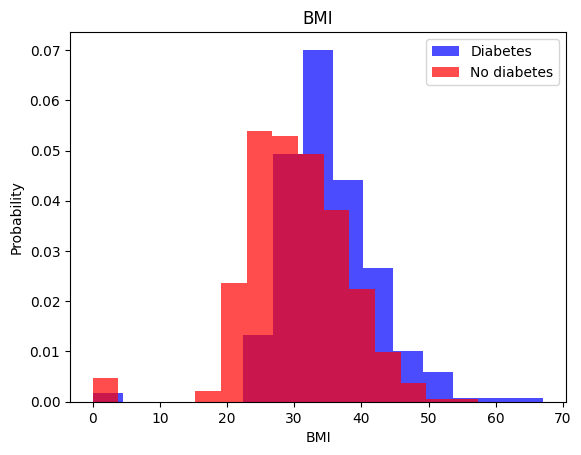

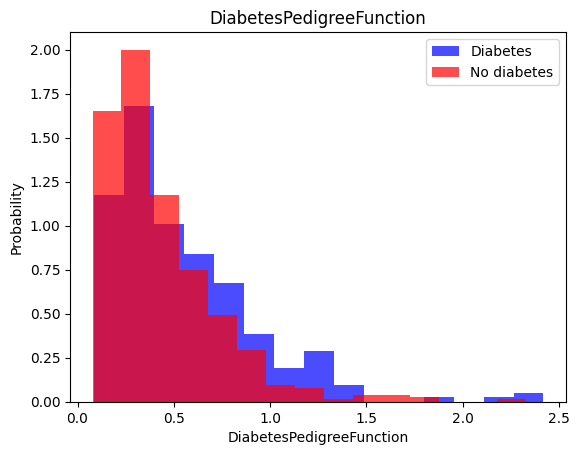

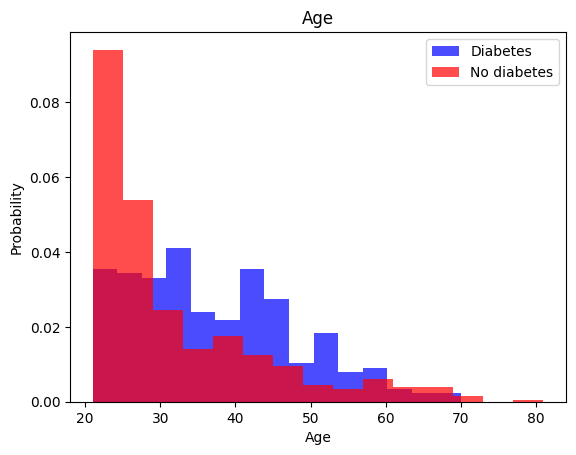

In [54]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    # Dataframe where all the outcomes are 1
    plt.hist(df[df['Outcome'] == 1][label], color = 'blue', label = 'Diabetes', alpha=0.7, density=True, bins=15)
    # Dateframe where all the outcomes are 0
    plt.hist(df[df['Outcome'] == 0][label], color = 'red', label = 'No diabetes', alpha=0.7, density=True, bins=15)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()


In [55]:
X = df[df.columns[:-1]].values
Y = df[df.columns[-1]].values

In [56]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(Y, (-1, 1))))
transform_df = pd.DataFrame(data, columns=df.columns)

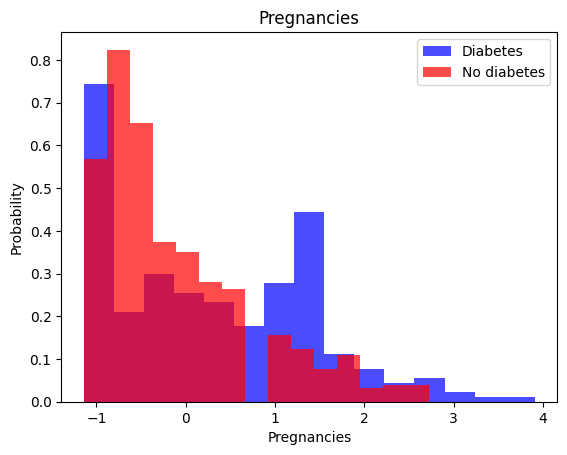

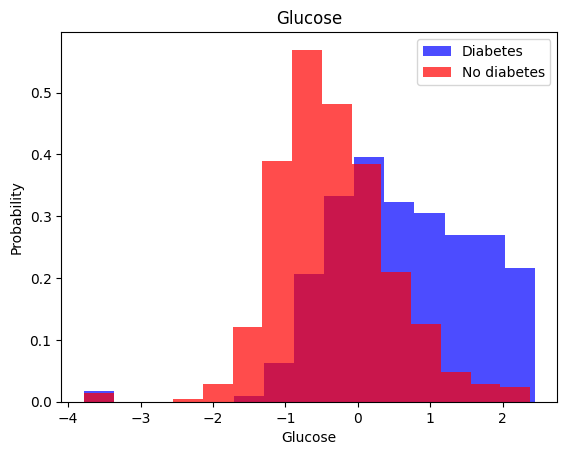

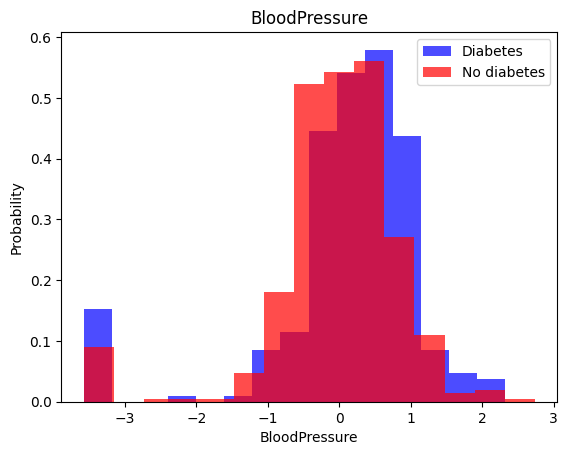

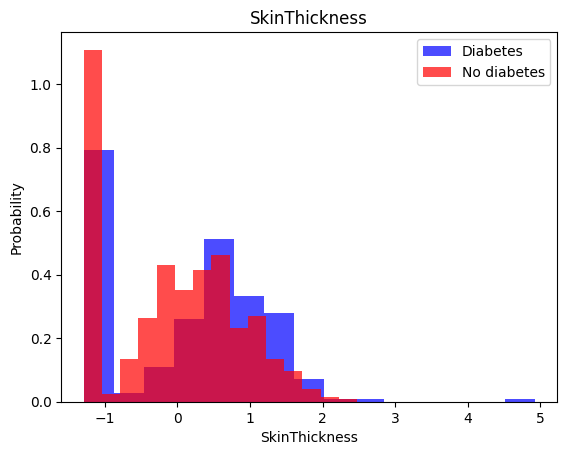

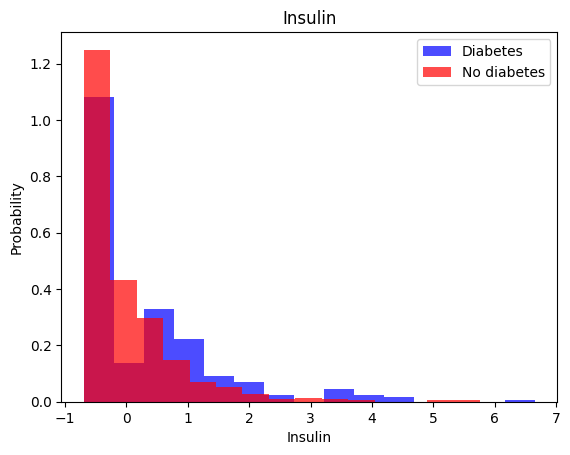

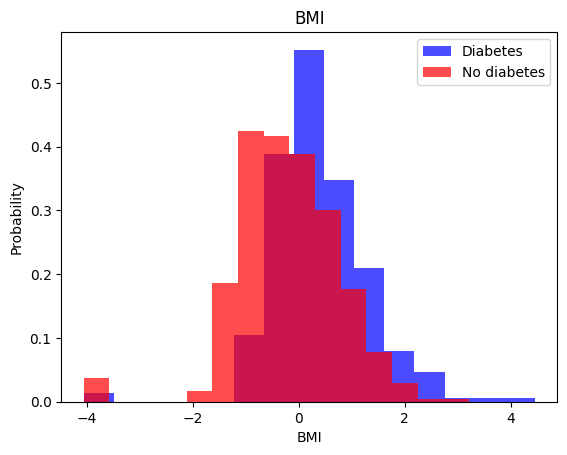

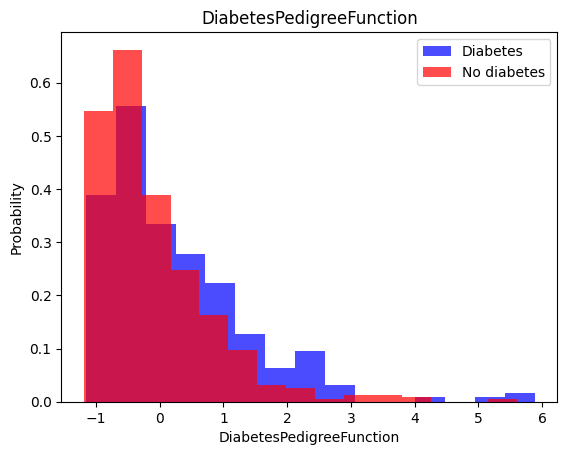

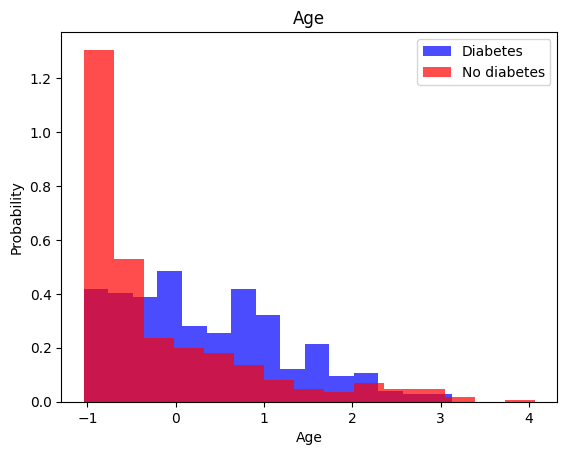

In [57]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    # Dataframe where all the outcomes are 1
    plt.hist(transform_df[transform_df['Outcome'] == 1][label], color = 'blue', label = 'Diabetes', alpha=0.7, density=True, bins=15)
    # Dateframe where all the outcomes are 0
    plt.hist(transform_df[transform_df['Outcome'] == 0][label], color = 'red', label = 'No diabetes', alpha=0.7, density=True, bins=15)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()


In [58]:
over = RandomOverSampler()
X, Y = over.fit_resample(X,Y)
data = np.hstack((X, np.reshape(Y, (-1, 1))))
transform_df = pd.DataFrame(data, columns=df.columns)

In [59]:
len(transform_df[transform_df["Outcome"] == 1]), len(transform_df[transform_df["Outcome"] == 0])

(500, 500)

In [60]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=0)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=0)

In [61]:
model = tf.keras.Sequential([
tf.keras.layers.Dense(16, activation='relu'), # Layer of 16 Neurons that are densly connected, and our activation is relu
tf.keras.layers.Dense(16, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid') # Binary classification
])

In [62]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss= tf.keras.losses.BinaryCrossentropy(),
              metrics= ['accuracy'])

In [63]:
model.evaluate(X_train, Y_train)

19/19 [==============================] - 0s 947us/step - loss: 0.7645 - accuracy: 0.4700


[0.7645072340965271, 0.4699999988079071]

In [64]:
model.evaluate(X_valid, Y_valid)

7/7 [==============================] - 0s 1ms/step - loss: 0.7819 - accuracy: 0.4150


[0.7818856239318848, 0.41499999165534973]

In [67]:
model.fit(X_train, Y_train, batch_size=16, epochs=20, validation_data=(X_valid, Y_valid))

Epoch 1/200
19/19 [==============================] - 0s 6ms/step - loss: 0.3926 - accuracy: 0.8150 - val_loss: 0.4127 - val_accuracy: 0.7950
Epoch 2/200
19/19 [==============================] - 0s 3ms/step - loss: 0.3907 - accuracy: 0.8167 - val_loss: 0.4085 - val_accuracy: 0.8000
Epoch 3/200
19/19 [==============================] - 0s 3ms/step - loss: 0.3907 - accuracy: 0.8183 - val_loss: 0.4088 - val_accuracy: 0.8050
Epoch 4/200
19/19 [==============================] - 0s 3ms/step - loss: 0.3899 - accuracy: 0.8200 - val_loss: 0.4073 - val_accuracy: 0.8000
Epoch 5/200
19/19 [==============================] - 0s 3ms/step - loss: 0.3895 - accuracy: 0.8150 - val_loss: 0.4101 - val_accuracy: 0.7950
Epoch 6/200
19/19 [==============================] - 0s 3ms/step - loss: 0.3877 - accuracy: 0.8183 - val_loss: 0.4082 - val_accuracy: 0.8000
Epoch 7/200
19/19 [==============================] - 0s 3ms/step - loss: 0.3878 - accuracy: 0.8233 - val_loss: 0.4082 - val_accuracy: 0.8000
Epoch 8/200
1